### Loading Libraries


In [1]:
# To ignore the imports warning
import warnings
warnings.filterwarnings("ignore")
# For the dataset loading 
import pandas as pd
# for arrays manupulation
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
# For making train and test data 
from sklearn.model_selection import train_test_split
# For scaling the dataset 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# Importing the machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Functions to import the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score, precision_score, f1_score

### Load Data Set File


In [3]:
df = pd.read_csv(r'card_transdata.csv')
df.dropna(inplace=True)
df.head()

distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0

In [4]:
df.describe().T

count       mean        std       min  \
distance_from_home              1000000.0  26.628792  65.390784  0.004874   
distance_from_last_transaction  1000000.0   5.036519  25.843093  0.000118   
ratio_to_median_purchase_price  1000000.0   1.824182   2.799589  0.004399   
repeat_retailer                 1000000.0   0.881536   0.323157  0.000000   
used_chip                       1000000.0   0.350399   0.477095  0.000000   
used_pin_number                 1000000.0   0.100608   0.300809  0.000000   
online_order                    1000000.0   0.650552   0.476796  0.000000   
fraud                           1000000.0   0.087403   0.282425  0.000000   

                                     25%       50%        75%           max  
distance_from_home              3.878008  9.967760  25.743985  10632.723672  
distance_from_last_transaction  0.296671  0.998650   3.355748  11851.104565  
ratio_to_median_purchase_price  0.475673  0.997717   2.096370    267.802942  
repeat_retailer                 1.000000  1.000000   1.000000      1.000000  
used_chip                       0.000000  0.000000   1.000000      1.000000  
used_pin_number                 0.000000  0.000000   0.000000      1.000000  
online_order                    0.000000  1.000000   1.000000      1.000000  
fraud                           0.000000  0.000000   0.000000      1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Data Exploration and Visualization



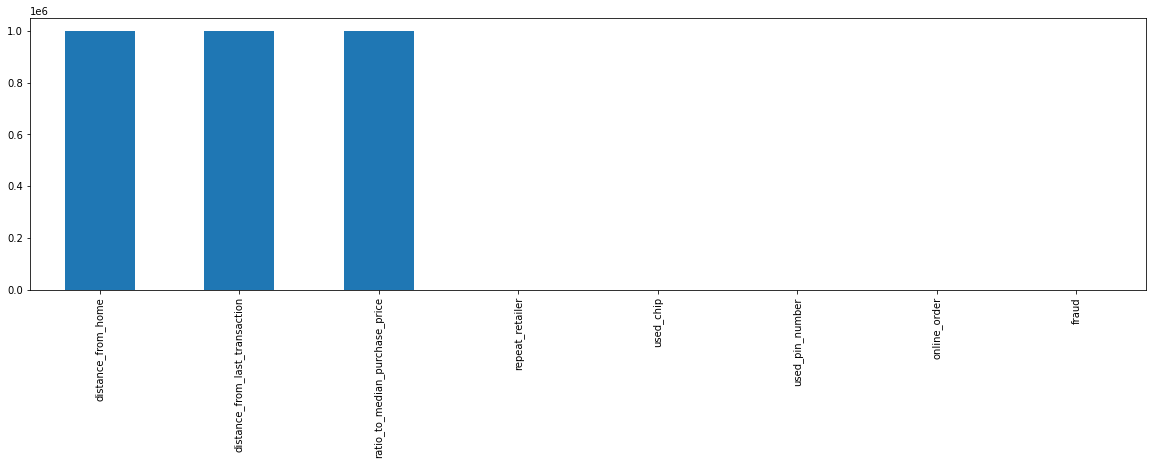

In [6]:
plt.figure(figsize=(20,5))
df.nunique().sort_values(ascending=False).plot(kind='bar');

In [7]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

Countplot of duration

Realtion Between Various Factors

In [8]:
# get unique values
df.nunique()


distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

The data types associated with the columns are:

Correlation Of All Atributes in DataFrame


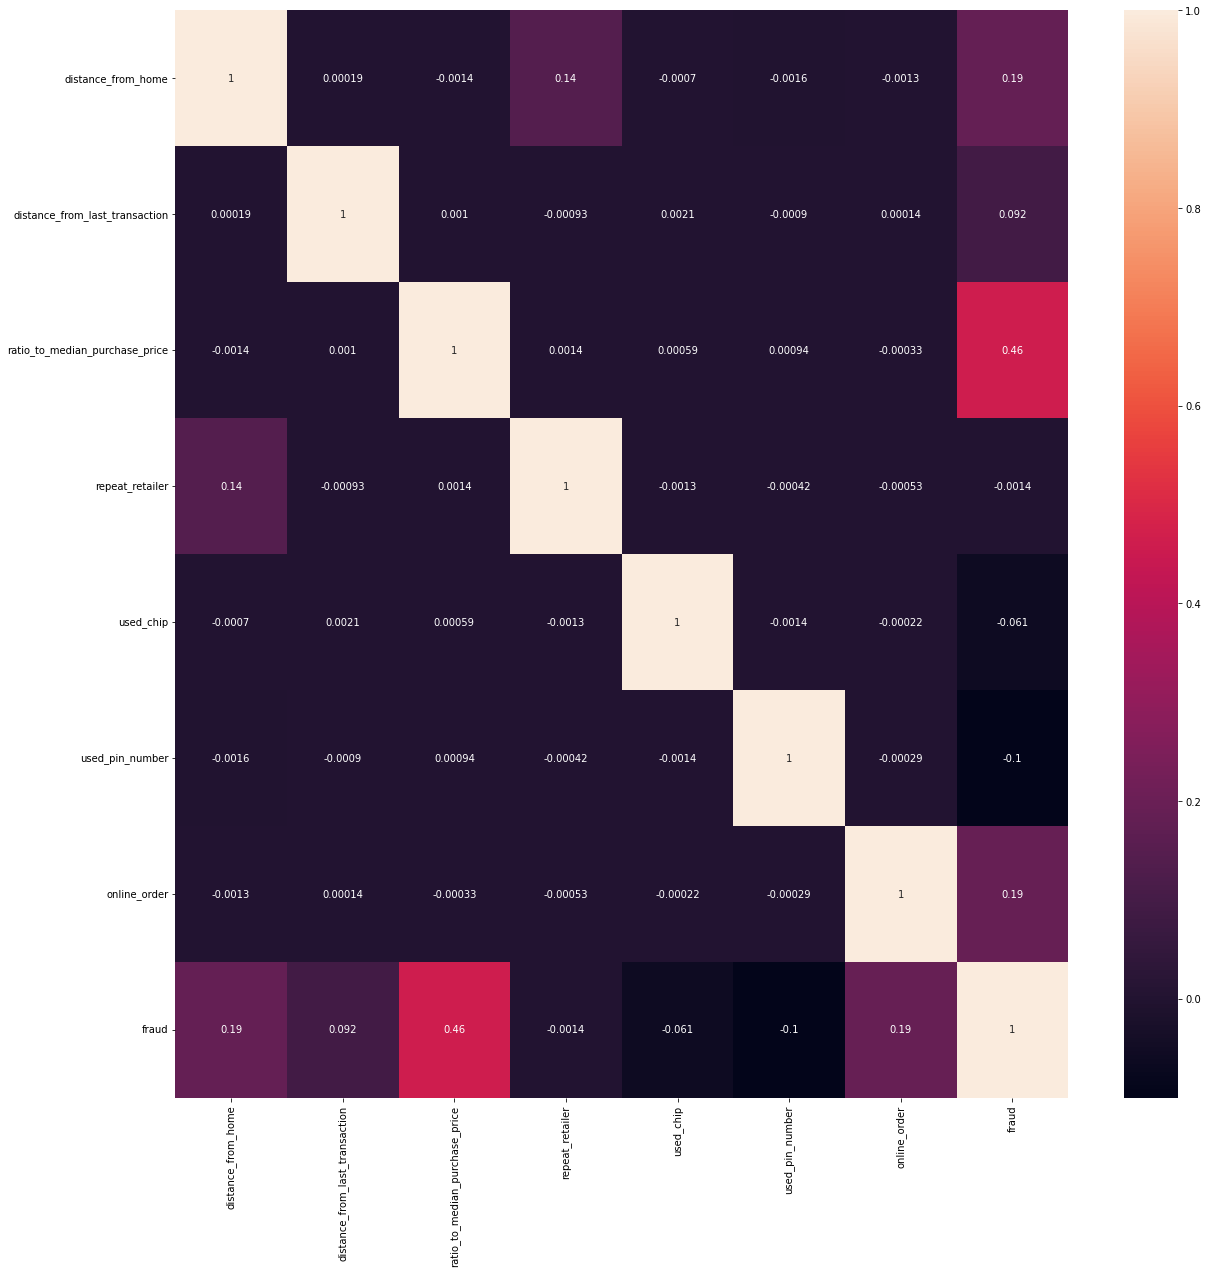

In [9]:

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot= True);


# Data Preprocessing
Drop Useless Column In Dataframe


In [10]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [11]:
df.shape

(1000000, 8)

In [12]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [18]:
df.repeat_retailer.value_counts()

1.0    881536
0.0    118464
Name: repeat_retailer, dtype: int64

In [19]:
df.used_chip.value_counts()

0.0    649601
1.0    350399
Name: used_chip, dtype: int64

In [20]:
df.used_pin_number.value_counts()

0.0    899392
1.0    100608
Name: used_pin_number, dtype: int64

In [17]:
df.online_order.value_counts()

1.0    650552
0.0    349448
Name: online_order, dtype: int64

In [22]:
# Checking class imbalancement
df.fraud.value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [54]:
temp = pd.DataFrame([], columns=df.keys())

In [55]:
# To counter imbalancment, we will downsample the dataset so that data will have same class records
temp = pd.concat([temp, df[df['fraud'] == 1]], axis=0)
temp = pd.concat([temp, df[df['fraud'] == 0][:temp.shape[0]]], axis=0)
# repeat retailer has lowest correlation with fraud, so it will be dropped
temp.drop(['repeat_retailer'],axis=1, inplace=True)

In [56]:
temp.fraud.value_counts()

1.0    87403
0.0    87403
Name: fraud, dtype: int64

Text(0.5, 1.0, 'Realtion Between Fraud and Distance from home')

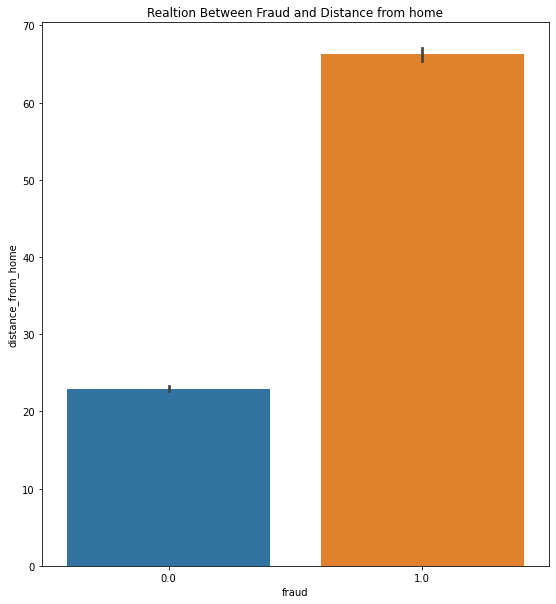

In [57]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
sns.barplot(x=temp['fraud'],y=temp.distance_from_home,data=temp)
plt.title('Realtion Between Fraud and Distance from home')

Text(0.5, 1.0, 'Realtion Between Fraud and Distance from last transaction')

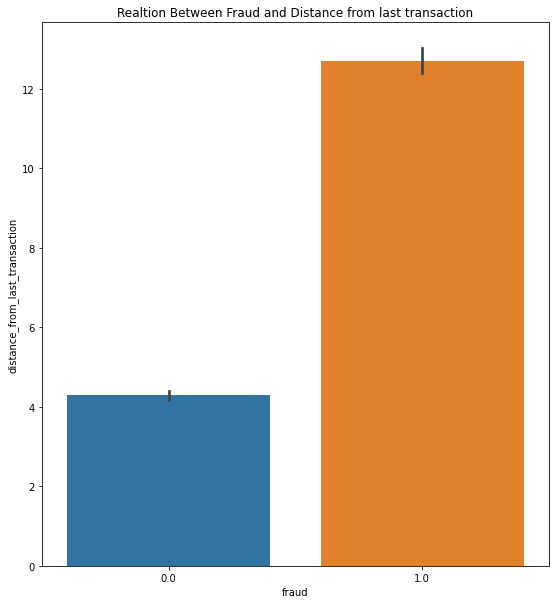

In [58]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
sns.barplot(x=temp['fraud'],y=temp.distance_from_last_transaction,data=temp)
plt.title('Realtion Between Fraud and Distance from last transaction')

Seprate Data Into Feature(x) and Labels(y)

In [79]:
X = temp.drop(['fraud'], axis=1).astype('float')
y= temp['fraud'].astype('float')

In [80]:
X

distance_from_home  distance_from_last_transaction  \
13               2.131956                       56.372401   
24               3.803057                       67.241081   
29              15.694986                      175.989182   
35              26.711462                        1.552008   
36              10.664474                        1.565769   
...                   ...                             ...   
95721           39.628811                        6.900791   
95722            9.027388                        0.067260   
95723            2.177936                        0.212883   
95725           24.709860                       28.943255   
95726            4.537430                        0.150221   

       ratio_to_median_purchase_price  used_chip  used_pin_number  \
13                           6.358667        0.0              0.0   
24                           1.872950        0.0              0.0   
29                           0.855623        0.0              0.0   
35                           4.603601        1.0              0.0   
36                           4.886521        0.0              0.0   
...                               ...        ...              ...   
95721                        0.226182        0.0              0.0   
95722                        1.744743        1.0              0.0   
95723                        2.001168        0.0              0.0   
95725                        1.962611        0.0              0.0   
95726                        2.051587        0.0              0.0   

       online_order  
13              1.0  
24              1.0  
29              1.0  
35              1.0  
36              1.0  
...             ...  
95721           0.0  
95722           1.0  
95723           0.0  
95725           0.0  
95726           1.0  

[174806 rows x 6 columns]

In [81]:
# train test split 
x_train,x_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.3,random_state=0, stratify=y.values)


Apply Standard Scaler On Traning Part Of Data Set


In [82]:
# scaling
std = StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)


# Applying Machine Learning Model

In [83]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

# Applying Logistics Regression Classifier

In [84]:
y_train

array([1., 0., 1., ..., 1., 1., 1.])

========== Logistic Regression ==========

Accuracy on validation set: 0.9395

Classification report : 
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     26221
         1.0       0.93      0.95      0.94     26221

    accuracy                           0.94     52442
   macro avg       0.94      0.94      0.94     52442
weighted avg       0.94      0.94      0.94     52442


Confusion Matrix : 
 [[24447  1774]
 [ 1397 24824]]


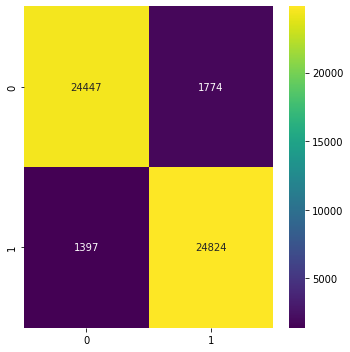

In [85]:
# For Logistics Regression Classifier
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
pred_log = log_model.predict(x_test)
results_log = modelEvaluation(pred_log, y_test, 'Logistic Regression')

# Performance Metrices 

In [87]:

from tabulate import tabulate
# showing all models result
dic = {
 'Metrics':['accuracy','precision','recall','f1-score'],
 'Logistic regression': results_log,
 
}
metrics_df = pd.DataFrame(dic)
metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

+-----------+-----------------------+
| Metrics   |   Logistic regression |
|-----------+-----------------------|
| accuracy  |              0.939533 |
| precision |              0.939624 |
| recall    |              0.939533 |
| f1-score  |              0.93953  |
+-----------+-----------------------+


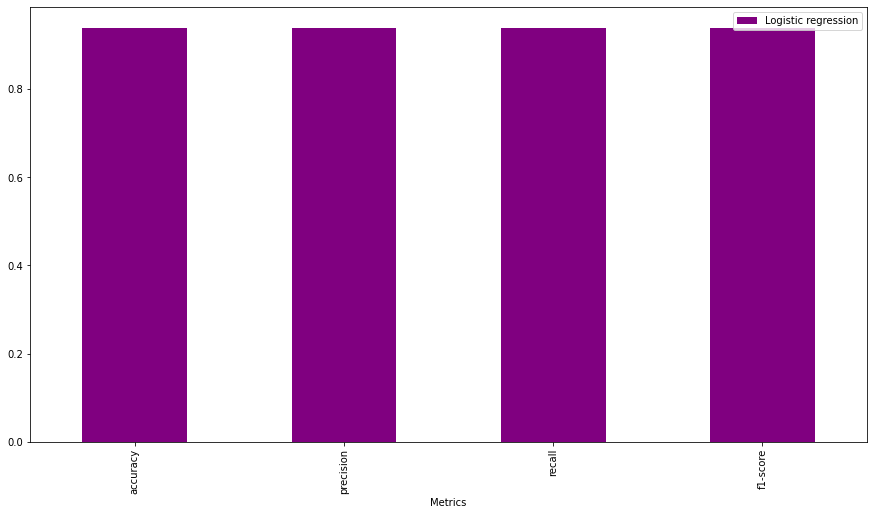

In [93]:
# Evluations comparisons graph
metrics_df.plot(kind='bar', figsize=(15,8), color = 'purple')
plt.show()

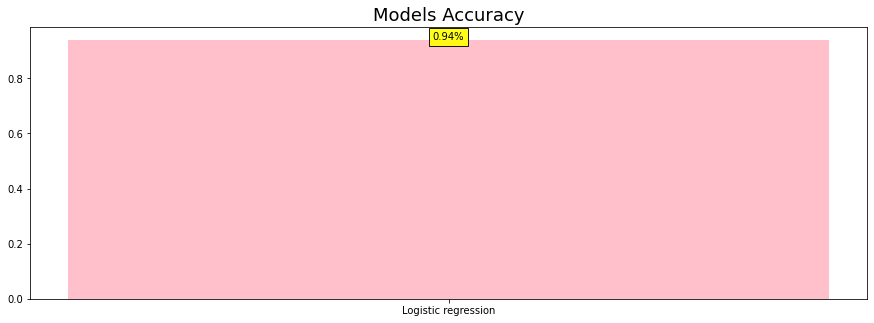

In [96]:
# Accuracy comparisons graphs
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc, color='pink')
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()